In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import IPython

#### First let us define the path to the training and test data sets. Just to be absolutely sure, we will check if the path is correct, that the file exists in the path we provided. This is done using the os.path.exists function.

In [3]:
training_data_filepath='data/train.csv'
test_data_filepath='data/test.csv'
print 'The path to the training data set is correct: ', os.path.exists(training_data_filepath)
print 'The path to the test data set is correct: ', os.path.exists(training_data_filepath)

The path to the training data set is correct:  True
The path to the test data set is correct:  True


#### Now that we know the files exist, let us first load the training data set to a pandas DataFrame. This DataFrame is just like a table, but with many powerful methods to make analysis on the table very easy. Read more about pandas DataFrame here http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [4]:
df_training = pd.read_csv(training_data_filepath)
df_test = pd.read_csv(test_data_filepath)

In [5]:
df_training.info()
df_test.info()
df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


#### From the above output we see that, the following features have at least one data missing
* 'Age'
* 'Cabin'
* 'Embarked'
* 'Name'
* 'Sex'
* 'Ticket'
##### Question: Why?

#### In principle we should try to fill these missing data through interpolation, mean or any other intelligent method. Bur for this excersise let us drop all  the above features with missing data.
We use the pandas drop method to drop the columns, hence axis=1, from the training DataFrame. The resulting DataFrame would be a clean training data set.

In [6]:
df_training_clean = df_training.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)
mean_fare_by_pclass = df_test[['Pclass','Fare']].groupby(['Pclass']).agg('mean')['Fare']
fare_given_pclass=df_test['Pclass'].apply(lambda x: mean_fare_by_pclass[x])
df_test['Fare'].fillna(fare_given_pclass,inplace=True)
df_test_clean = df_test.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)

#### Our goal here is to train a machine to learn the relationship between different features about the titanic passangers  and their survival chance. Therefore out target is the column * 'Survived' *. We want to drop this column from our DataFrame assign 
The pop method drops the Survived column from the data frame and assigns it to a variable target

In [7]:
target = df_training_clean.pop('Survived') 

In [8]:
df_training_clean.info()
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int64(4)<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(1), int64(4)

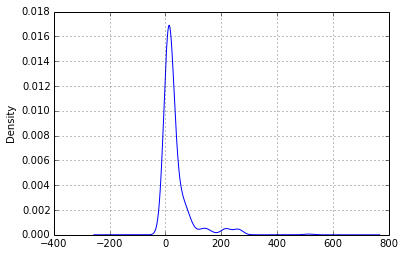

In [9]:
%matplotlib inline
df_test_clean['Fare'].plot(kind='kde')

#### Now let us train a decision tree algorithm using the training data and the corresponding target. We will use the scikit-learn (sklearn) python package. Scikit expects a pure numpy array so we should convert our training DataFrame to numpy array as follows.

In [10]:
array_training_clean=df_training_clean.values
array_test_clean = df_test_clean.values
array_target=target.values
#the shape method tells us about the rank of the array
print 'The shape of training array is: ',array_training_clean.shape 
print 'The shape of the target array is: ',array_target.shape 
array_test_clean

The shape of training array is:  (891, 5)
The shape of the target array is:  (891,)


array([[  8.92000000e+02,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.82920000e+00],
       [  8.93000000e+02,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   7.00000000e+00],
       [  8.94000000e+02,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.68750000e+00],
       ..., 
       [  1.30700000e+03,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.25000000e+00],
       [  1.30800000e+03,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.05000000e+00],
       [  1.30900000e+03,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.23583000e+01]])

#### Now the training part -  it takes only just three lines!!! 

In [11]:
from sklearn import tree #import tree algorithm from scikit-learn
#Intitialize the DecisionTreeClassifier algorithm with optional parameters 
classifier = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) 
#use the initialized tree to learn the relationship between 
#known passanger information, features, and know state of survival 
classifier.fit(array_training_clean, array_target)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=4, max_features=None, min_density=None,
            min_samples_leaf=5, min_samples_split=2, random_state=None,
            splitter='best')

#### Let us see what the machine will predict 

In [12]:
#The variable classifier in the above cell contains a tree which has a 
#knowledge of how passengers features are related to their survival.

#Just to have insight, let's see how our decision tree predicts 
print "First 5 training target"
print array_target[0:5]
print "Prediction on first 5 training Rows"
print classifier.predict(array_training_clean[0:5,:])

# We can see the score, the efficiency of the training as follows
print("Training Score: ", classifier.score(array_training_clean, array_target))
#Since our analysis is simple, we did not attempt to fill the missing data etc.  
#the score score is low, in principle with a proper data cleaning etc. 
# we could get the maximim training score of 1. 

First 5 training target
[0 1 1 1 0]
Prediction on first 5 training Rows
[0 1 0 1 0]
('Training Score: ', 0.734006734006734)


## Weekend Assignment
#### Your task it to do the following - just copy paste the python codes in between the lines and it should work. 

1. load the test data into pandas DataFrame 

        df_test = pd.read_csv(test_data_filepath)
              
2. Check the nature of the test data using the info() method as 

        df_test.info()    
     
     Here you will notice that there is missing data for the Fare column for one passenger. 
     Since we need the same set of features in the training and test data sets, 
     **we can NOT drop it**. We need therefore to fill it. i) Compute the mean 
     Fare for different classes, and put them in a dictionary ii) get the rows whose
     Fare is missing iii) fill the missing data according to the class the passanger is in 

        i) mean_fare_by_pclass = df_test[['Pclass','Fare']].groupby(['Pclass']).agg('mean')['Fare']
    
        ii) fare_given_pclass=df_test['Pclass'].apply(lambda x: mean_fare_by_pclass[x])
    
        iii) df_test['Fare'].fillna(fare_given_pclass,inplace=True)
    
3. Similar to what we did for the training data, drop the columns 
    ['Age','Cabin','Embarked','Name','Sex','Ticket'] as 

        df_test_clean = df_test.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)
                    
4. Convert the test DataFrame to numpy array 

        array_test_clean = df_test_clean.values
               
5. Predict the survival of passengers using the tree we trained as

        survival_prediction = classifier.predict(array_test_clean)     
          
6. Save the prediction to a file. If you want, you can submit this file in Kaggle page and get your score 

        with open('prediction.csv', 'w') as csvfile:    
            for survived in survival_prediction:
                 csvfile.write("{}\n".format(survived)) 
    
7. **BONUS:** Visualize the result. Be creative :)

In [13]:
survival_prediction = classifier.predict(array_test_clean)

In [37]:
print survival_prediction

[0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 0]


In [38]:
(x,y)=array_test_clean.shape
c1=c2=c3=0
l1=[]; l2=[];l3=[]; l1s=[]; l2s=[];l3s=[]
for i in range(x):
    if array_test_clean[i][2]==1 :
        l1.append(survival_prediction[i])
    elif array_test_clean[i][2]==2 :
        l2.append(survival_prediction[i])
    else:
        l3.append(survival_prediction[i])
for i in range(len(l1)):
    if l1[i]==1 :
        c1=c1+1
for i in range(len(l2)):
    if l2[i]==1 :
        c2=c2+1
for i in range(len(l3)):
    if l3[i]==1 :
        c3=c3+1
c=float(c1+c2+c3)
A1=((c1*100)/c)
A2=((c2*100)/c)
A3=((c3*100)/c)
b1=float(len(l1))
b2=float(len(l2))
b3=float(len(l3))

In [39]:
A1,A2,A3,A1+A2+A3

(41.509433962264154, 4.40251572327044, 54.088050314465406, 100.0)

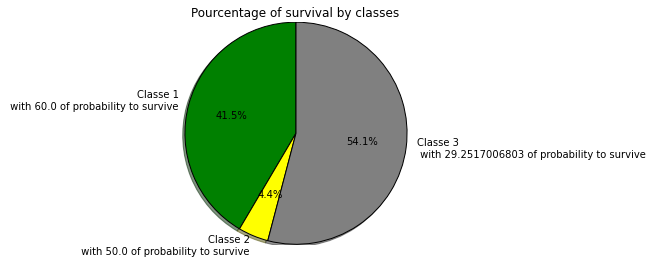

In [40]:
labels = 'Classe 1\n with %s of probability to survive' %((c1/b1)*100), 'Classe 2\n with %s of probability to survive' %((c2/b2)*100), 'Classe 3\n with %s of probability to survive' %((c3/b3)*100)
sizes = [A1,A2,A3]
colors = ['green', 'yellow', 'grey']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pourcentage of survival by classes')
#ax.set_aspect('equal')